In [117]:
%matplotlib notebook
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [118]:
m=0.1
r=0.1
d=0.3
g=9.81
psi_punto=400
theta0=(np.pi)/4
t=np.linspace(0,8,10000)
y0 = np.array([0, 0, (np.pi) / 4, 0])

In [119]:
def System(y, t, m, r, d, g, psi_punto, theta0):
    
    phi = y[0]
    psi = y[1]
    theta = y[2]
    theta_punto = y[3]
    
    I_z = 0.5 * m * r ** 2
    I_0 = 0.25 * m * r ** 2 + m * d ** 2
    
    phi_punto = (I_z * psi_punto * (np.cos(theta0) - np.cos(theta))) / (I_0 * np.sin(theta) ** 2 + I_z * np.cos(theta) ** 2)
    theta_doble_punto = ((phi_punto ** 2) * np.sin(theta) * np.cos(theta) * (I_0 - I_z) - phi_punto * psi_punto * I_z * np.sin(theta) + m * g * d * np.sin(theta)) / I_0
    
    return [phi_punto, psi_punto, theta_punto, theta_doble_punto]

In [120]:
integracion = odeint(System, y0, t, args=(m, r, d, g, psi_punto, theta0))

In [124]:
psi=integracion[:,0]
phi=integracion[:,1]
theta=integracion[:,2]
theta_punto=integracion[:,3]

Punto e


<IPython.core.display.Javascript object>


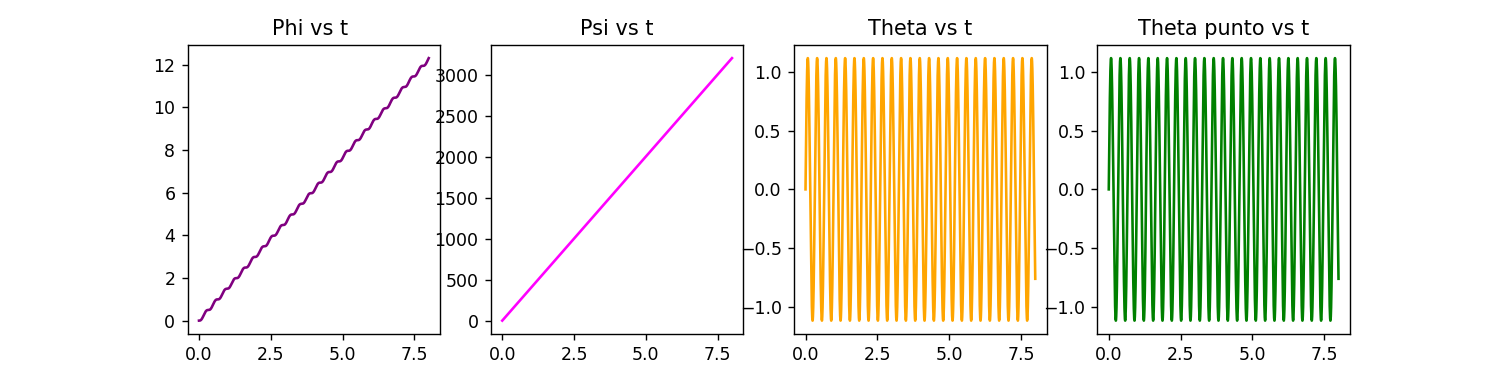

Text(0.5, 1.0, 'Theta punto vs t')

In [125]:
print("Punto e")

fig=plt.figure(figsize=(12,3))

ax=fig.add_subplot(141)
ax1=fig.add_subplot(142)
ax2=fig.add_subplot(143)
ax3=fig.add_subplot(144)

ax.plot(t,psi_punto,color="purple")
ax1.plot(t,phi_punto,color="magenta")
ax2.plot(t,theta_punto,color="orange")
ax3.plot(t,theta_doble_punto,color="green")

ax.set_title('Phi vs t ')
ax1.set_title('Psi vs t')
ax2.set_title('Theta vs t')
ax3.set_title('Theta punto vs t')

Punto f


<IPython.core.display.Javascript object>


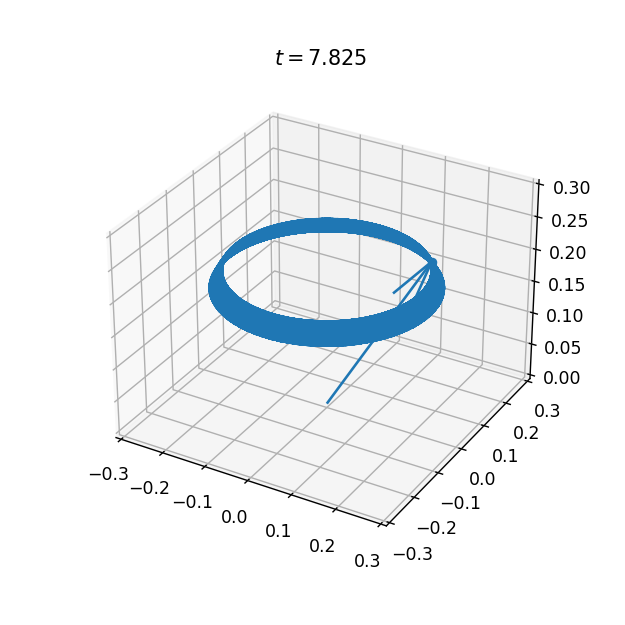

In [128]:
print("Punto f")

x = d*np.sin(theta)*np.sin(phi)
y= d*np.sin(theta)*np.cos(phi)
z = d*np.cos(theta)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection="3d")

def init_():
    
    ax.clear()
    ax.set_zlim(0,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_xlim(-0.3,0.3)
    
def Update_(i):
    
    init_()
    
    ax.quiver(0,0,0,x[10*i],y[10*i],z[10*i])
    ax.plot(x[:10*i],y[:10*i],z[:10*i],"--")
    ax.scatter(x[10*i],y[10*i],z[10*i])
    ax.set_title(r"$t = %s$"%(round(t[10*i],3)))
        
Animation = anim.FuncAnimation(fig,Update_,frames=len(t[::10]),init_func=init_)

In [135]:
print("Punto g")
print("La velocidad de precesión del sistema es: ",abs(theta_punto[-1])," pi rad/s")


Punto g
La velocidad de precesión del sistema es:  0.7631462242280894  pi rad/s
